In [55]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd

In [56]:
A = pd.read_csv("Electric_Production.csv")

In [57]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [58]:
A.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


# Convert Date

In [59]:
A.DATE = pd.to_datetime(A.DATE)

# Make Month as index and drop it as a column

In [60]:
A.index = A.DATE

In [61]:
A = A.drop(labels=["DATE"],axis=1)

In [62]:
A.columns = ["Electricity"]

In [63]:
A

,Electricity
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


# Plot and decompose

In [64]:
import matplotlib.pyplot as plt

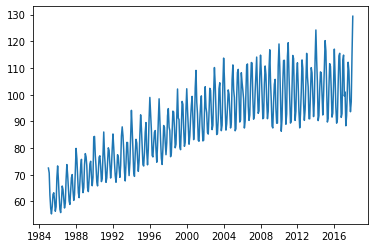

In [65]:
plt.plot(A)

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(A,model="multiplicative")

<AxesSubplot:xlabel='DATE'>

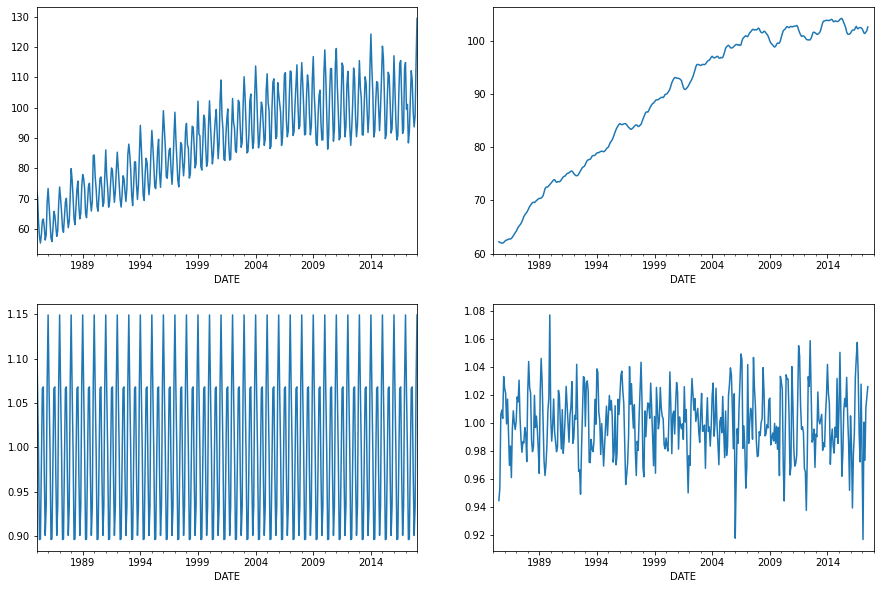

In [67]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sd.observed.plot()

plt.subplot(2,2,2)
sd.trend.plot()

plt.subplot(2,2,3)
sd.seasonal.plot()

plt.subplot(2,2,4)
sd.resid.plot()

# Rolling mean and Rolling Stdev

In [68]:
RM = A.rolling(window=12).mean()
RSD = A.rolling(window=12).std()

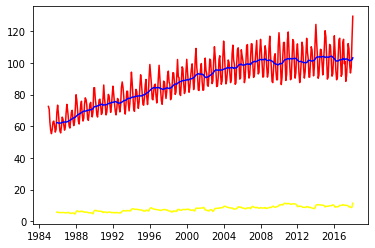

In [69]:
plt.plot(A,c="red")
plt.plot(RM,c="blue")
plt.plot(RSD,c="yellow")

# Conversion attempt 1:
Convert TS --> Log

In [70]:
import numpy as np

In [71]:
A_log = np.log(A)
RM_log = A_log.rolling(window=12).mean()
RSD_log = A_log.rolling(window=12).std()

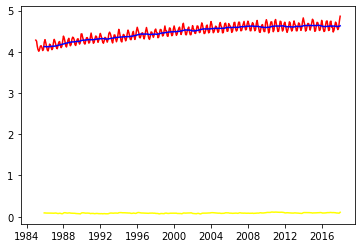

In [72]:
plt.plot(A_log,c="red")
plt.plot(RM_log,c="blue")
plt.plot(RSD_log,c="yellow")

# Conversion attempt 2:
log_A - RM_logA

In [81]:
A_log = np.log(A)
RM_log = A_log.rolling(window=12).mean()
RSD_log = A_log.rolling(window=12).std()
TS = A_log-RM_log

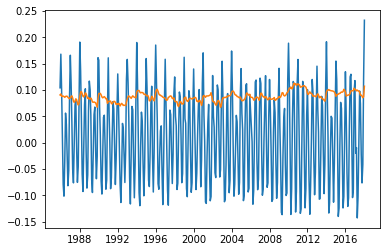

In [82]:
plt.plot(TS)
plt.plot(RSD_log)

# Remove Null Values

In [86]:
TS_new = TS[TS.Electricity.isna()==False]

# Divide data in training and testing set

In [91]:
TS_new.shape

(386, 1)

In [93]:
386*0.8

308.8

In [94]:
traning_data = TS_new[0:308]
testing_data = TS_new[308:]

In [95]:
traning_data.shape

(308, 1)

In [97]:
testing_data.shape

(78, 1)

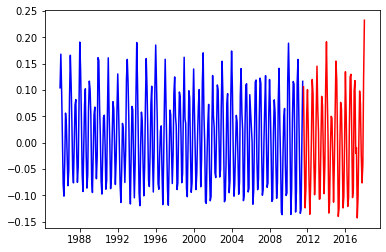

In [98]:
plt.plot(traning_data,c="blue")
plt.plot(testing_data,c="red")

# Forecast

In [99]:
from statsmodels.tsa.ar_model import AutoReg

In [112]:
model = AutoReg(traning_data,lags=12).fit()

In [113]:
pred = model.predict(start="2011-08-01",end="2018-01-01")

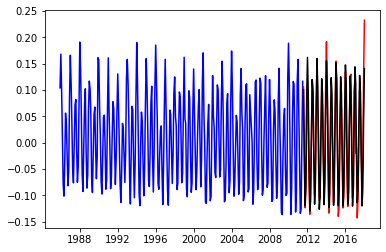

In [114]:
plt.plot(traning_data,c="blue")
plt.plot(testing_data,c="red")
plt.plot(pred,c="black")

In [119]:
R = RM_log[RM_log.Electricity.isna()==False]

In [132]:
pd.DataFrame(np.exp(pred+RM_log.tail(78).Electricity),columns=A.columns)

,Electricity
2011-08-01,112.961165
2011-09-01,100.034843
2011-10-01,90.752527
2011-11-01,94.523309
2011-12-01,110.764680
...,...
2017-09-01,98.078341
2017-10-01,89.619279
2017-11-01,93.086324
2017-12-01,106.047084


In [131]:
A.tail(78)

,Electricity
DATE,
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566
2011-11-01,93.8095
2011-12-01,107.3312
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [133]:
model.predict(start="2021-08-01",end="2022-01-01")

2021-08-01    0.101518
2021-09-01   -0.020304
2021-10-01   -0.115314
2021-11-01   -0.088640
2021-12-01    0.033607
2022-01-01    0.130345
Freq: MS, dtype: float64